In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn')

## getting data ready 

### loading and inspecting data

In [2]:
df = pd.read_csv("features.csv",index_col = 0,parse_dates = True)
df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,...,vix_big_ch_down,change_in_OI,change_in_OI_cat,nifty_rsi,nifty_rsi_pos,macd_crossover,macd_BB_band,normalized_nifty_atr,normalized__nifty_BB_width,target
2011-05-17,-0.010378,-0.021244,-0.020037,DOWN,DOWN,DOWN,DOWN,UP,DOWN,21.03,...,0.0,0.023960,UP,25.569621,BELOW,DOWN,below,0.017777,0.114964,DOWN
2011-05-18,-0.003364,-0.006673,-0.015216,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,20.71,...,0.0,-0.050097,DOWN,26.549126,BELOW,DOWN,below,0.017571,0.119933,UP
2011-05-19,0.002905,-0.002613,-0.014486,UP,DOWN,DOWN,DOWN,DOWN,DOWN,20.41,...,0.0,0.018426,UP,29.239011,BELOW,DOWN,below,0.016773,0.117405,UP
2011-05-20,0.008570,0.008135,-0.047036,UP,UP,DOWN,UP,UP,DOWN,19.45,...,1.0,-0.013273,DOWN,35.863866,INSIDE,DOWN,below,0.016595,0.108590,DOWN
2011-05-23,-0.018352,-0.028825,0.081748,DOWN,DOWN,UP,DOWN,DOWN,UP,21.04,...,0.0,0.024321,UP,37.486862,INSIDE,DOWN,below,0.016313,0.104956,UP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2280 entries, 2011-05-17 to 2020-08-27
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nifty_pct_change            2280 non-null   float64
 1   bank_pct_change             2280 non-null   float64
 2   vix_pct_change              2280 non-null   float64
 3   nifty_CL_PL                 2280 non-null   object 
 4   bank_CL_PL                  2280 non-null   object 
 5   vix_CL_PL                   2280 non-null   object 
 6   nifty_CH_PH                 2280 non-null   object 
 7   bank_CH_PH                  2280 non-null   object 
 8   vix_CH_PH                   2280 non-null   object 
 9   vix_Close                   2280 non-null   float64
 10  vix_big_ch_up               2280 non-null   float64
 11  vix_big_ch_down             2280 non-null   float64
 12  change_in_OI                2280 non-null   float64
 13  change_in_OI_ca

In [4]:
df.isna().sum()

nifty_pct_change              0
bank_pct_change               0
vix_pct_change                0
nifty_CL_PL                   0
bank_CL_PL                    0
vix_CL_PL                     0
nifty_CH_PH                   0
bank_CH_PH                    0
vix_CH_PH                     0
vix_Close                     0
vix_big_ch_up                 0
vix_big_ch_down               0
change_in_OI                  0
change_in_OI_cat              0
nifty_rsi                     0
nifty_rsi_pos                 0
macd_crossover                0
macd_BB_band                  0
normalized_nifty_atr          0
normalized__nifty_BB_width    0
target                        0
dtype: int64

In [5]:
# converting target to 1 and 0
# 1 means nifty price went next day and 0 means price went down next day 
df["target"] = np.where(df.target == "UP",1,0)

# split train and target features 
X = df.drop("target",axis = 1)
y = df["target"]

In [6]:
# checking class frequency 
print(y.value_counts())

print()
print(f"looking at class frequency {1214/len(X) * 100} % of the times nifty opened positive next day")

1    1214
0    1066
Name: target, dtype: int64

looking at class frequency 53.24561403508772 % of the times nifty opened positive next day


### Need to encode categorical features 


In [7]:
categorical_features = ['nifty_CL_PL','bank_CL_PL', 'vix_CL_PL', 'nifty_CH_PH', 
                        'bank_CH_PH', 'vix_CH_PH','change_in_OI_cat',
                        'nifty_rsi_pos', 'macd_crossover', 'macd_BB_band']


X_tranformed =  pd.get_dummies(X[['nifty_CL_PL','bank_CL_PL', 'vix_CL_PL', 'nifty_CH_PH', 
                                        'bank_CH_PH', 'vix_CH_PH','change_in_OI_cat',
                                        'nifty_rsi_pos', 'macd_crossover', 'macd_BB_band']]).copy()

X_numerical = X[['nifty_pct_change','bank_pct_change','vix_pct_change',
                   'vix_big_ch_up','vix_big_ch_down','change_in_OI',
                   'nifty_rsi']]

X = pd.concat([X_numerical,X_tranformed],axis = 1)
X.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,vix_big_ch_up,vix_big_ch_down,change_in_OI,nifty_rsi,nifty_CL_PL_DOWN,nifty_CL_PL_UP,bank_CL_PL_DOWN,...,change_in_OI_cat_DOWN,change_in_OI_cat_UP,nifty_rsi_pos_ABOVE,nifty_rsi_pos_BELOW,nifty_rsi_pos_INSIDE,macd_crossover_DOWN,macd_crossover_UP,macd_BB_band_INSIDE,macd_BB_band_UP,macd_BB_band_below
2011-05-17,-0.010378,-0.021244,-0.020037,0.0,0.0,0.023960,25.569621,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2011-05-18,-0.003364,-0.006673,-0.015216,0.0,0.0,-0.050097,26.549126,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2011-05-19,0.002905,-0.002613,-0.014486,0.0,0.0,0.018426,29.239011,0,1,1,...,0,1,0,1,0,1,0,0,0,1
2011-05-20,0.008570,0.008135,-0.047036,0.0,1.0,-0.013273,35.863866,0,1,0,...,1,0,0,0,1,1,0,0,0,1
2011-05-23,-0.018352,-0.028825,0.081748,1.0,0.0,0.024321,37.486862,1,0,1,...,0,1,0,0,1,1,0,0,0,1


### Training and testing `Random forest` classifier with `default Hyperparameters`

In [8]:
### split the data 
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1710, 29), (570, 29), (1710,), (570,))

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

`accuracy score` 

In [10]:
clf.score(X_test,y_test)

0.49298245614035086

`classification report`

In [11]:
y_preds = clf.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40       259
           1       0.53      0.59      0.56       311

    accuracy                           0.49       570
   macro avg       0.48      0.48      0.48       570
weighted avg       0.49      0.49      0.49       570



`confusion matrix`

In [12]:
cm = pd.DataFrame(confusion_matrix(y_test,y_preds),columns = ["Pred Down","Pred UP"],index = ["actual Down","actual UP"])
cm

,Pred Down,Pred UP
actual Down,98,161
actual UP,128,183


In [13]:
from sklearn.model_selection import cross_val_score
print("five fold cross validation mean accuracy of the model:",np.mean(cross_val_score(clf,X,y,cv = 5)))

five fold cross validation mean accuracy of the model: 0.506578947368421


`Feature Importance`

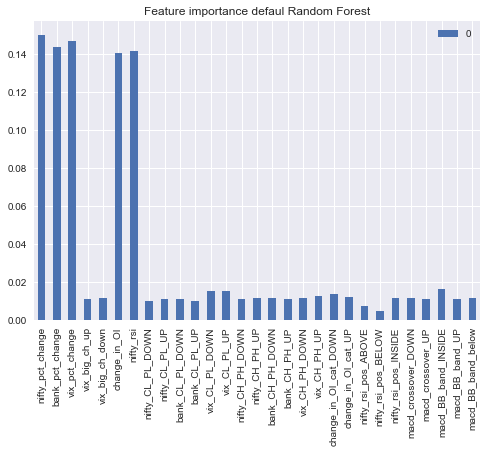

In [14]:
pd.DataFrame(clf.feature_importances_,index=list(X_train.columns)).plot(kind = "bar")
plt.title("Feature importance defaul Random Forest")
plt.show()

In [15]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test) 

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

#roc_df = pd.DataFrame({"thresholds":thresholds,
                        #"tpr":tpr,
                        #"fpr":fpr})

In [16]:
def evaluate_model(y_true,y_preds):
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    
    return pd.DataFrame([accuracy,precision,recall,f1],
                        index=["accuracy_score","precision_score","recall_score","f1_score"],
                       columns=["eval_metrics"])


def plot_roc_curve(fpr, tpr):
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1],linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

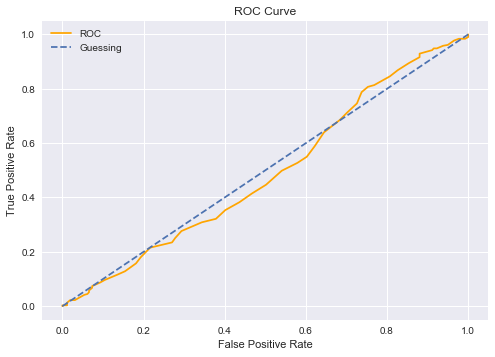

In [17]:
plot_roc_curve(fpr, tpr)

In [32]:
baseline_metrics = evaluate_model(y_test,y_preds)

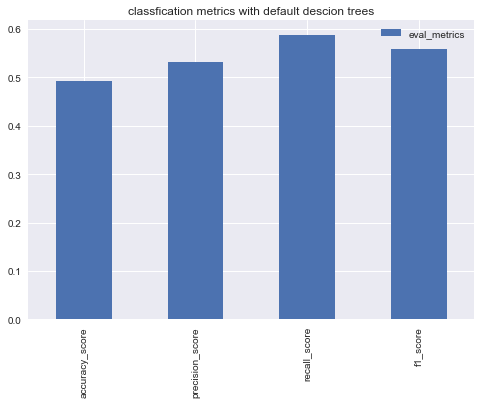

In [18]:
evaluate_model(y_test,y_preds).plot(kind = "bar")
plt.title("classfication metrics with default descion trees")
plt.show()

### Tuning Hyperparamterrs with RandomizedSearchCV
#### parameters to be tuned
* `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* `max_features`:The number of features to consider when looking for the best split

* `n_estimators`: The number of trees in the forest.
* `min_samples_leaf`:The minimum number of samples required to be at a leaf node
* `min_samples_split`: The minimum number of samples required to split an internal node

for more info on random forest paramters https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [19]:
# setting paramater grid
grid = {'n_estimators': [i for i in range(10,200,30)],
          'max_depth': [1,2,3,4,5,6,7,8,9,10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [i for i in range(50,300,50)],
          'min_samples_leaf': [100,200],
          "max_leaf_nodes":[4,5,6,7,8,9]}

grid

{'n_estimators': [10, 40, 70, 100, 130, 160, 190],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [50, 100, 150, 200, 250],
 'min_samples_leaf': [100, 200],
 'max_leaf_nodes': [4, 5, 6, 7, 8, 9]}

In [20]:
# total combinations 
7 * 10 * 2 * 5 * 2 * 6

8400

In [21]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

clf = RandomForestClassifier(n_jobs= 1)
rs_clf = RandomizedSearchCV(clf,
                            param_distributions=grid, 
                            n_iter = 1000, # trying 1000 random param combination from grid 
                            cv = 5, # setting Kfolds to 5 
                            verbose = 2,
                            refit=True)

rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=10, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]  n_est

[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=6, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=6, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_est

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[

[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth

[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=2, total=   0.3s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=10 
[CV

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=6 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=6 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=6

[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth

[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=9 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=9 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=9 
[

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1 
[CV]

[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8 
[CV]  

[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth

[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=10 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=10 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_d

[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=5 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=5 

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=5 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=4 
[CV]

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth

[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_e

[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]

[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.3s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=9 
[

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=5 
[

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth

[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=6 
[CV]

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=

[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_esti

[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3 
[

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, ma

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=8 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7 
[

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=

[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth

[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=7 
[CV

[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9 
[CV]

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=

[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=7 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=7 
[

[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]

[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV

[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=

[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_es

[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=3 
[CV]

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_esti

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=9 
[CV

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth

[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=1 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth

[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=8, total=   0.0s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=8 
[CV]

[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]

[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=1 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth

[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=10 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_de

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth

[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=9, total=   0.2s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=8

[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=2 
[CV

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=3 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=3 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=3 
[C

[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2 
[CV

[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth

[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=

[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=1 
[CV

[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth

[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=8 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[C

[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth

[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6, total=   0.1s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 
[CV]  n

[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max

[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=2 
[CV

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=3, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth

[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]

[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=10 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=10 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_dep

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=7 
[CV]

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=7 
[

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth

[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[

[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=2 
[CV]

[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth

[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=2 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=2 
[CV]

[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6 
[CV]  n_estimators=130, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=6, total=   0.2s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV

[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=10, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 

[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]

[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=10 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=

[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=40, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=

[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]

[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.3s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=7 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=7 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=7 
[CV]  

[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=1 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=1 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=6 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=6, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=6 
[CV]

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=9 
[CV] 

[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.1s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV

[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=7, total=   0.0s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=6, total=   0.2s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=1 
[CV]

[CV]  n_estimators=100, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.2s
[CV] n_estimators=100, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=100, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=10 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=10 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_d

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=7 
[CV] 

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=5 
[CV

[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=1 
[

[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, ma

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=2 
[CV

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=5 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=5 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=5 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=

[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=1 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=1 

[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth=3 
[CV]

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=10 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.0s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=7, total=   0.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=10 
[CV

[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV

[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7 
[CV]  n_estimators=70, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=10 
[C

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=8, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=130, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=7, max_features=sqrt, max_depth

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=

[CV]  n_estimators=40, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=1

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=8 
[CV]

[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=6 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=9, max_features=sqrt, max_depth=3 
[

[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1 
[CV]  n_e

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=4 
[CV]

[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=9 
[CV]  n_estimators=70, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, ma

[CV]  n_estimators=190, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=3, total=   0.3s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=5 
[CV

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=9 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=9 

[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1 
[CV]  n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=130, min_samples_split=150, min_samples_leaf=200, max_leaf_nodes=7, max_features=sqrt, max_depth

[CV]  n_estimators=40, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=5 
[CV]

[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.2s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[

[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 12.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
rs_preds = rs_clf.predict(X_test)

In [23]:
print(classification_report(y_test,rs_preds))

              precision    recall  f1-score   support

           0       0.43      0.10      0.17       259
           1       0.54      0.88      0.67       311

    accuracy                           0.53       570
   macro avg       0.49      0.49      0.42       570
weighted avg       0.49      0.53      0.44       570



In [30]:
rs_metrics = evaluate_model(y_test,rs_preds)
evaluate_model(y_test,rs_preds)

,eval_metrics
accuracy_score,0.529825
precision_score,0.542406
recall_score,0.884244
f1_score,0.672372


In [25]:
cm = pd.DataFrame(confusion_matrix(y_test,rs_clf.best_estimator_.predict(X_test)),columns = ["Pred Down","Pred UP"],index = ["actual Down","actual UP"])
cm

,Pred Down,Pred UP
actual Down,27,232
actual UP,36,275


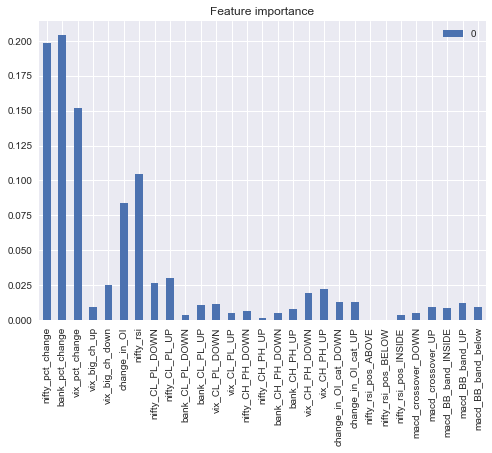

In [26]:
pd.DataFrame(rs_clf.best_estimator_.feature_importances_,index=list(X_train.columns)).plot(kind = "bar")
plt.title("Feature importance")
plt.show()

In [35]:
compare_metrics  = pd.DataFrame({"baseline_Random forest":baseline_metrics.values[0],
                                 "optimized_Random_forest":rs_metrics.values[0]},index = baseline_metrics.index)

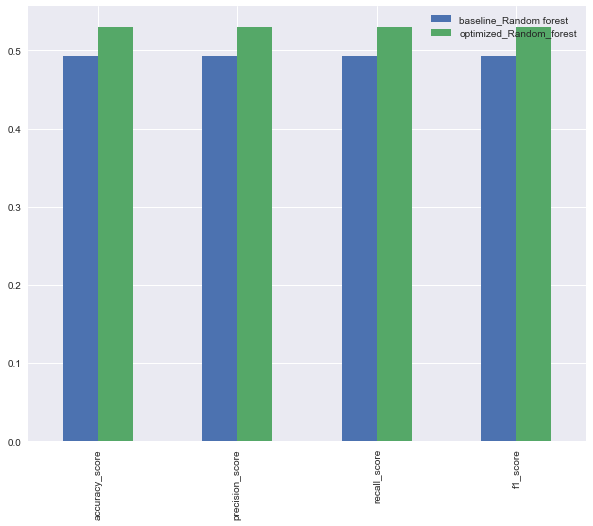

In [36]:
compare_metrics.plot.bar(figsize=(10, 8));